In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import os
from datetime import datetime
from citipy import citipy
from config import weather_api_key
from scipy.stats import linregress

In [3]:
lat = np.random.uniform(-90, 90, size = 1500)
lng = np.random.uniform(-180, 180, size = 1500)
lat_lng = zip(lat, lng)
coordinates = list(lat_lng)

cities = []
for lat, lng in coordinates:
    city = citipy.nearest_city(lat, lng).city_name    
    if city not in cities:
        cities.append(city)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for ii, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (ii % 50 == 0 and ii >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, recond, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | luanda
Processing Record 3 of Set 1 | eskasem
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hidalgo
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | cameta
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | churapcha
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | burica
City not found. Skipping...
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 

Processing Record 38 of Set 4 | marsh harbour
Processing Record 39 of Set 4 | asfi
Processing Record 40 of Set 4 | betare oya
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | milingimbi
City not found. Skipping...
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | zaoyang
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | maymyo
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | estrela
Processing Record 50 of Set 4 | nanortalik
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | nyzhnya duvanka
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | raiganj
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | emerald
Processing Record 7 of Set 5 | ngunguru
Processing Record 8 of Set 5 | pokhara
Processing Record 9 of Set 5 | niteroi
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Se

Processing Record 29 of Set 8 | sovetskiy
Processing Record 30 of Set 8 | teya
Processing Record 31 of Set 8 | dhidhdhoo
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | leshukonskoye
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | ekhabi
Processing Record 37 of Set 8 | kupang
Processing Record 38 of Set 8 | benguela
Processing Record 39 of Set 8 | el alto
Processing Record 40 of Set 8 | kegayli
City not found. Skipping...
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | zbiroh
Processing Record 43 of Set 8 | akdepe
Processing Record 44 of Set 8 | kazerun
Processing Record 45 of Set 8 | monrovia
Processing Record 46 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 8 | solnechnyy
Processing Record 48 of Set 8 | umm kaddadah
Processing Record 49 of Set 8 | darnah
Processing Record 50 of Set 8 | walvis bay
Processing Record 1 of Set 9 | tiznit


Processing Record 19 of Set 12 | barcelos
Processing Record 20 of Set 12 | prado
Processing Record 21 of Set 12 | den helder
Processing Record 22 of Set 12 | chai badan
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | manturovo
Processing Record 25 of Set 12 | vila
Processing Record 26 of Set 12 | iguatemi
Processing Record 27 of Set 12 | sabang
Processing Record 28 of Set 12 | valadares
Processing Record 29 of Set 12 | marzuq
Processing Record 30 of Set 12 | guigue
Processing Record 31 of Set 12 | calvinia
Processing Record 32 of Set 12 | barbastro
Processing Record 33 of Set 12 | torrington
Processing Record 34 of Set 12 | sinjai
Processing Record 35 of Set 12 | ler
Processing Record 36 of Set 12 | gawler
Processing Record 37 of Set 12 | kaeo
Processing Record 38 of Set 12 | estelle
Processing Record 39 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 40 of Set 12 | bambanglipuro
Processing Record 41 of Set 12 | griffith
Processing Record 4

In [5]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-14.42,100,100,8.68,RU,2021-11-30 22:59:50
1,Luanda,-8.8368,13.2343,78.80,83,20,8.05,AO,2021-11-30 22:59:51
2,Punta Arenas,-53.1500,-70.9167,57.31,51,0,21.85,CL,2021-11-30 22:59:52
3,Hidalgo,20.5000,-99.0000,64.62,53,4,7.63,MX,2021-11-30 22:59:43
4,Tiksi,71.6872,128.8694,-22.59,98,99,6.67,RU,2021-11-30 22:59:52
5,Cameta,-2.2444,-49.4958,83.10,68,99,3.42,BR,2021-11-30 22:59:53
6,Mataura,-46.1927,168.8643,60.48,69,98,5.97,NZ,2021-11-30 22:59:53
7,Churapcha,62.0025,132.4325,-12.86,99,100,3.96,RU,2021-11-30 22:59:53
8,Tuatapere,-46.1333,167.6833,60.82,58,61,4.59,NZ,2021-11-30 22:59:54
9,Chokurdakh,70.6333,147.9167,-13.68,98,100,5.95,RU,2021-11-30 22:59:55


In [51]:
new_column_order = ['City', 'Country', 'Date',
                    'Lat', 'Lng', 'Max Temp',
                    'Humidity', 'Cloudiness', 'Wind Speed'
]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-11-30 22:59:50,73.5069,80.5464,-14.42,100,100,8.68
1,Luanda,AO,2021-11-30 22:59:51,-8.8368,13.2343,78.80,83,20,8.05
2,Punta Arenas,CL,2021-11-30 22:59:52,-53.1500,-70.9167,57.31,51,0,21.85
3,Hidalgo,MX,2021-11-30 22:59:43,20.5000,-99.0000,64.62,53,4,7.63
4,Tiksi,RU,2021-11-30 22:59:52,71.6872,128.8694,-22.59,98,99,6.67
5,Cameta,BR,2021-11-30 22:59:53,-2.2444,-49.4958,83.10,68,99,3.42
6,Mataura,NZ,2021-11-30 22:59:53,-46.1927,168.8643,60.48,69,98,5.97
7,Churapcha,RU,2021-11-30 22:59:53,62.0025,132.4325,-12.86,99,100,3.96
8,Tuatapere,NZ,2021-11-30 22:59:54,-46.1333,167.6833,60.82,58,61,4.59
9,Chokurdakh,RU,2021-11-30 22:59:55,70.6333,147.9167,-13.68,98,100,5.95


In [7]:
output_data_file = os.path.join('weather_data','cities.csv')
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [8]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [9]:
today = time.strftime('%x')
today

'11/30/21'

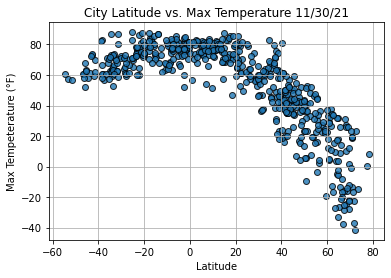

In [10]:
plt.scatter(lats,
           max_temps,
           edgecolor = 'k', lw = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%x")}')
plt.ylabel('Max Tempeterature (\N{DEGREE SIGN}F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')
plt.show()

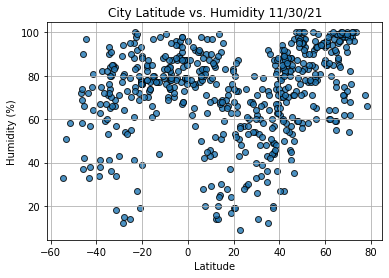

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

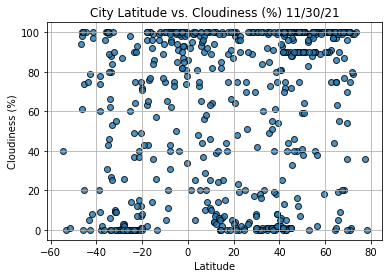

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

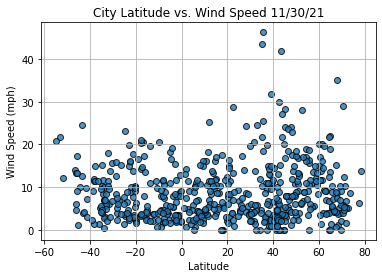

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to perform and plot a linear regresssion on the weather data 
# and plot the regression line with the equation on the graph.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r value is: {r_value:.3f}.')
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
file_to_read = os.path.join('weather_data', 'cities.csv')
city_data_df = pd.read_csv(file_to_read)

In [30]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

The r value is: -0.861.


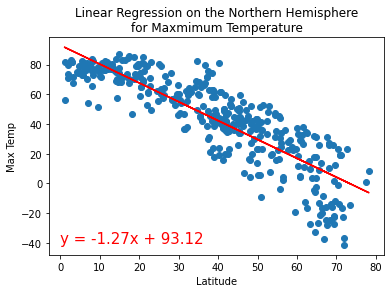

In [39]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
title = 'Linear Regression on the Northern Hemisphere\nfor Maxmimum Temperature'
y_label = 'Max Temp'
location = (0, -40)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.536.


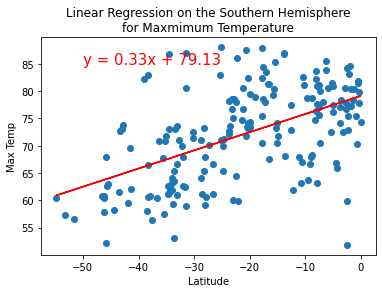

In [38]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
title = 'Linear Regression on the Southern Hemisphere\nfor Maxmimum Temperature'
y_label = 'Max Temp'
location = (-50, 85)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.375.


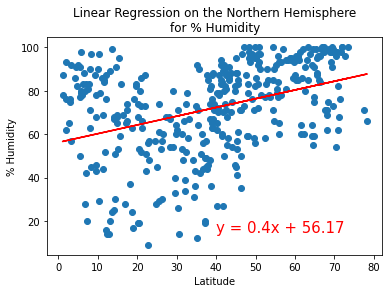

In [43]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
title = 'Linear Regression on the Northern Hemisphere\nfor % Humidity'
y_label = '% Humidity'
location = (40, 15)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.421.


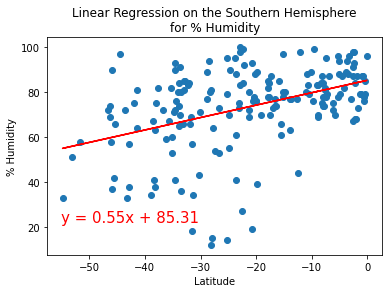

In [50]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
title = 'Linear Regression on the Southern Hemisphere\nfor % Humidity'
y_label = '% Humidity'
location = (-55, 22)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.212.


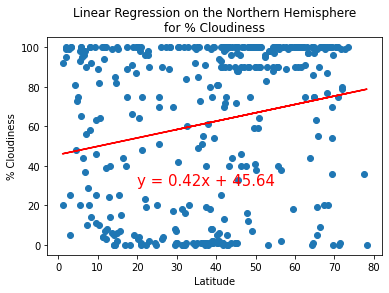

In [53]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
title = 'Linear Regression on the Northern Hemisphere\nfor % Cloudiness'
y_label = '% Cloudiness'
location = (20, 30)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.364.


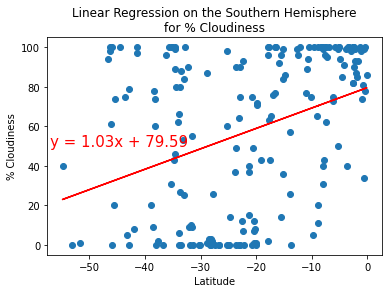

In [63]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
title = 'Linear Regression on the Southern Hemisphere\nfor % Cloudiness'
y_label = '% Cloudiness'
location = (-57, 50)

plot_linear_regression(x, y, title, y_label, location)

The r value is: 0.098.


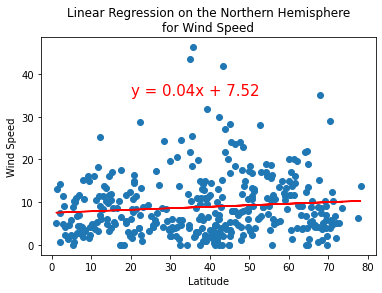

In [65]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
title = 'Linear Regression on the Northern Hemisphere\nfor Wind Speed'
y_label = 'Wind Speed'
location = (20, 35)

plot_linear_regression(x, y, title, y_label, location)

The r value is: -0.199.


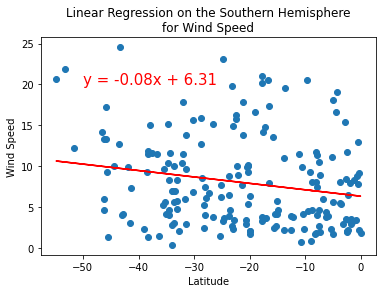

In [69]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
title = 'Linear Regression on the Southern Hemisphere\nfor Wind Speed'
y_label = 'Wind Speed'
location = (-50, 20)

plot_linear_regression(x, y, title, y_label, location)